# Task 3: Clustering Analysis – Customer Segmentation


# Aim : 
    
Perform customer segmentation using clustering techniques to group customers based on their
purchasing behavior, allowing businesses to target each segment effectively.

In [20]:
# Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 

# 1. Load and Inspect the Dataset

In [2]:
# Reading the data

original_df = pd.read_csv('customer_data.csv')
df = original_df.copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
print('\nNon-Null Count and Dtype of each column :  \n')
df.info()


Non-Null Count and Dtype of each column :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    int32  
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
 5   Cluster                 200 non-null    int32  
dtypes: float64(3), int32(2), int64(1)
memory usage: 7.9 KB


In [22]:
print('\nSummary statistics to understand ranges of values : \n')
df.describe()


Summary statistics to understand ranges of values : 



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,0.400962,0.373443,0.502041,1.640000
std,57.879185,0.497633,0.268635,0.215285,0.263505,1.134387
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,0.000000,0.206731,0.217213,0.344388,1.000000
50%,100.500000,0.000000,0.346154,0.381148,0.500000,2.000000
75%,150.250000,1.000000,0.596154,0.516393,0.734694,3.000000
max,200.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [23]:
# Finding null values

print('Total number of null values in each colnum : ')
df.isnull().sum()

Total number of null values in each colnum : 


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [6]:
# Shape of Dataset

print('Shape of Dataset : ')
df.shape

Shape of Dataset : 


(200, 5)

In [7]:
# Number of Duplicates

print('Number of duplicate rows : ', df.duplicated().sum())

Number of duplicate rows :  0


# 2. Data Preprocessing

In [8]:
# Standardize the data

# Gender Encoding

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


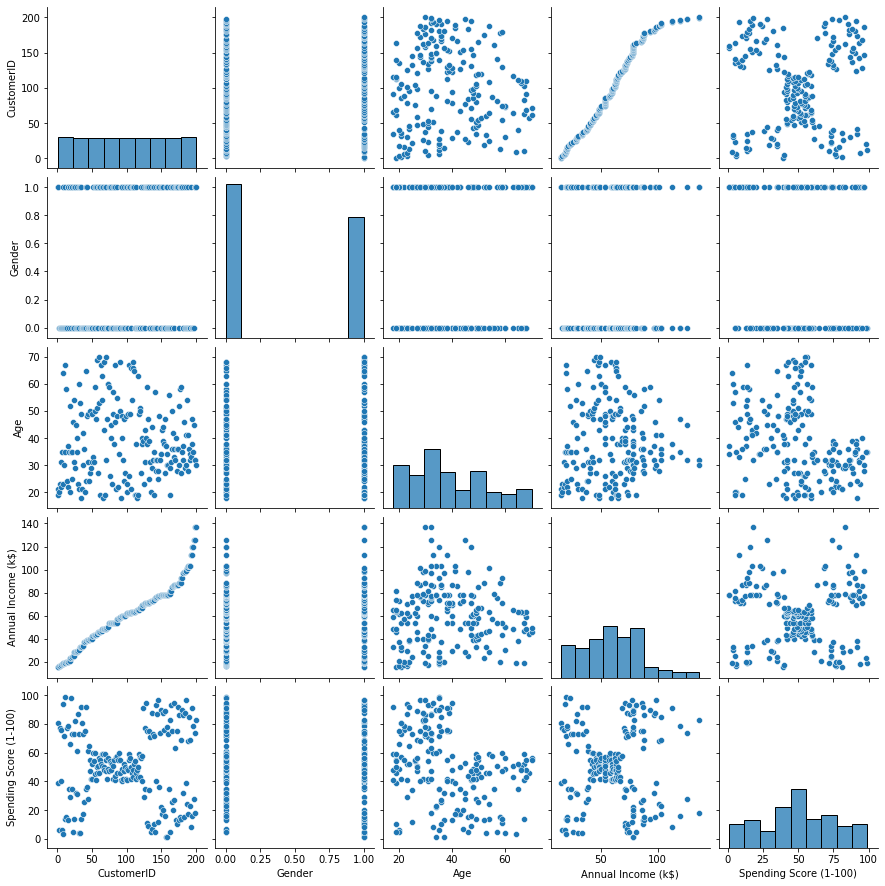

In [9]:
sns.pairplot(df)

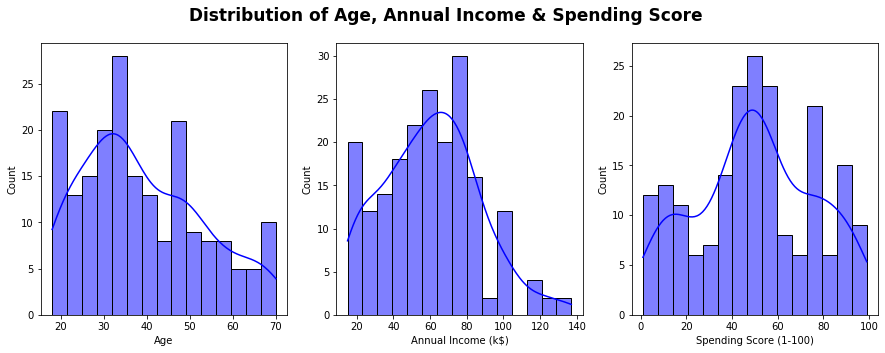

In [10]:
# Finding Shape of histogram to determine which scaler technique to be applied

plt.figure(figsize=(15, 5))

for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, bins=15, kde=True, color='blue')
    plt.xlabel(col)

plt.suptitle('Distribution of Age, Annual Income & Spending Score', fontsize=17, fontweight = 'bold', ha='center')
plt.subplots_adjust(wspace=0.2)

# Display
plt.show()


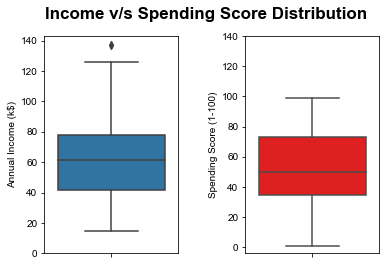

In [11]:
### Income v/s Spending

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Annual Income (k$)"])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140]) 
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Spending Score (1-100)"], color='red')
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140]) 


plt.suptitle('Income v/s Spending Score Distribution', fontsize=17, fontweight='bold', x=0.5)
plt.subplots_adjust(wspace=0.5)
sns.set_style('dark')

plt.show()

In [12]:
# Since feateres are not normally distributed , therefore we are using MinMaxScaler Technique to scale the features

# Normalise data 
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,0.019231,0.000000,0.387755
1,2,1,0.057692,0.000000,0.816327
2,3,0,0.038462,0.008197,0.051020
3,4,0,0.096154,0.008197,0.775510
4,5,0,0.250000,0.016393,0.397959


In [13]:
# Confirming that all values are in range 0 to 1

print('\nMinimun value of normalized data :\n ' , df[num_cols].min())
print('\nMaximum value of normalized data :\n ' , df[num_cols].max())


Minimun value of normalized data :
  Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

Maximum value of normalized data :
  Age                       1.0
Annual Income (k$)        1.0
Spending Score (1-100)    1.0
dtype: float64


# 3. Clustering

In [27]:
# Determining the optimal number of clusters using the Elbow Method (within-cluster sum of squares (WCSS))

wcss_values = []
k_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss_values.append(kmeans.inertia_)
    k_values.append(k)




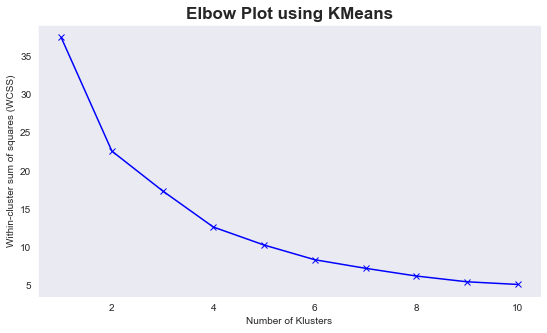

In [15]:
#  Plot Elbow plot
plt.figure(figsize=(9, 5))

plt.plot(k_values, wcss_values, 'bx-')
plt.xlabel('Number of Klusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Plot using KMeans', fontsize=17, fontweight='bold')
plt.show()

In [24]:
# Create k-means object - 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit k-means object to the data
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Add cluster labels to original df
df['Cluster'] = kmeans.labels_


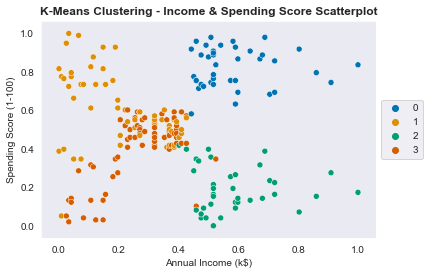

In [17]:
# Plot clusters

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='colorblind')

plt.title('K-Means Clustering - Income & Spending Score Scatterplot', fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.set_style('darkgrid')

plt.show()

In [18]:
# Centroids (centre points) of each of the 4 clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[0.28605769 0.58278689 0.82168367]
 [0.14304993 0.20491803 0.60508414]
 [0.41093117 0.58606557 0.1895811 ]
 [0.69201183 0.26809584 0.39764521]]


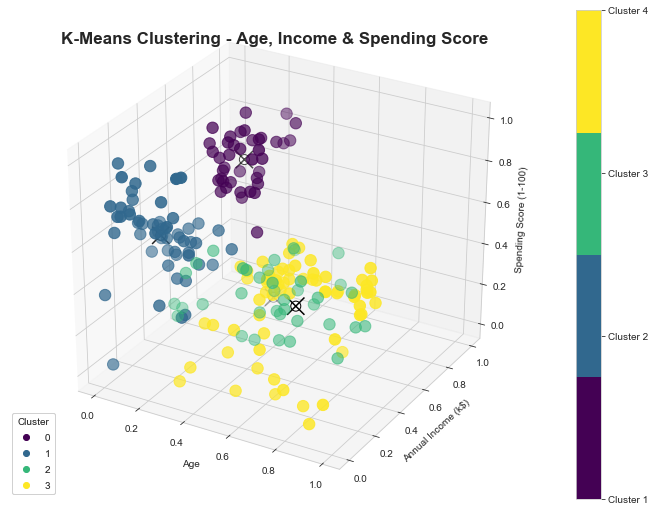

In [19]:
# Plot 3D clusters

sns.set_style('whitegrid')
fig = plt.figure(figsize=(12, 9))

# Create custom colormap 
my_cmap = plt.cm.get_cmap('viridis', 4)

# Create 3D scatter plot 
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], s=130, 
                     cmap=my_cmap)

# Add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)

# Set the colorbar to show cluster labels
cbar = plt.colorbar(scatter)
cbar.set_ticks(np.arange(0, 4))
cbar.set_ticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# Set axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-Means Clustering - Age, Income & Spending Score', fontsize=17, fontweight='bold')

# Plot centroids
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=300, linewidths=3, color='black', zorder=10)

# Coordinates of centroids of cluster
x = [0.14304993, 0.41093117, 0.28605769, 0.69201183]
y = [0.20491803, 0.58606557, 0.58278689, 0.26809584]
z = [0.60508414, 0.1895811, 0.82168367, 0.39764521]

# Highlight centroids with different color and size
ax.scatter(
    x,
    y,
    z,
    color='white',
    s=100,  # Marker size
    label='Highlighted Points',
    edgecolors='black'
)
# Display
plt.show()

Summary

Dataset Source : https://github.com/kennedykwangari/Mall-Customer-Segmentation-Data/blob/master/Mall_Customers.csv

1. Initial Findings:
    - The youngest customer is 18 years old and the oldest is 70.
    - The average Annual Income is 60.56k$ and the average Spending Score is 50.2.
    - There is a weak negative correlation (-0.058) between Gender and Spending Score, indicating that male customers 
      tend to have slightly higher spending scores than female customers.
    - There is a weak negative correlation (-0.327) between Spending Score and Age, indicating that younger customers 
      tend to have slightly higher spending scores.
    - There is a weak negative correlation (-0.012) between Annual Income and Age, indicating that younger customers 
      tend to have only very slightly higher incomes.
      
      
2. Data Preprocessing
    - Standardize data --> Done Gender Encoding
    - Determine which scaler technique to apply --> MinMaxScaler
    
    
3. Clustering
    - Conclusion from 3D scatterplot :
        - Cluster 1 (Purple) 
            - They are younger on average and have both high incomes and high spending scores. 
            - They are already high-spending and given their age their incomes are likely to increase further.
            
        - Cluster 2 (Blue) 
            - They are young with relatively high spending scores, but less income. 
            - These customers may be students or young adults just starting their careers — so again their incomes are
               likely to increase.
               
        - Cluster 3 (Green) 
            - They are a little younger and have higher incomes. 
            - They are likely to be focused on practicality and value for money, while also having the disposable income 
               to spend on more premium products and services.
               
        - Cluster 4 (Yellow) 
            - They are mostly consists of older customers (on average) with more moderate income and spending scores.
            - They are likely to be focused on practicality, convenience and value. 
            - They may being less likely to be influenced by trends.
           
           
4. Visualization
    - Created 2D Scatter Plot to represent the clusters with reduced dimensions to two for visualization.
    - Ploted clusters in different colors
    - Pair Plots
        - Visualize relationships between features within clusters.
    - Centroid Visuals
        - Show the centroid of each cluster for better interpretation.